In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import ndimage

Saving Tony Stark.jpg to Tony Stark (2).jpg


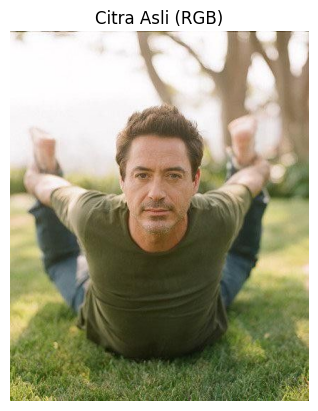

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Citra Asli (RGB)')
plt.axis('off')
plt.show()

#**Median Filter**

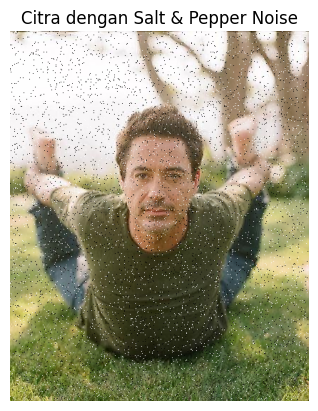

In [ ]:
def add_salt_pepper_noise(img, salt_prob=0.02, pepper_prob=0.02):
    noisy_img = img.copy()
    total_pixels = img.shape[0] * img.shape[1]

    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape[:2]]
    noisy_img[coords[0], coords[1]] = [255, 255, 255]

    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape[:2]]
    noisy_img[coords[0], coords[1]] = [0, 0, 0]

    return noisy_img

noisy_img = add_salt_pepper_noise(img_rgb, salt_prob=0.02, pepper_prob=0.02)

plt.imshow(noisy_img)
plt.title('Citra dengan Salt & Pepper Noise')
plt.axis('off')
plt.show()

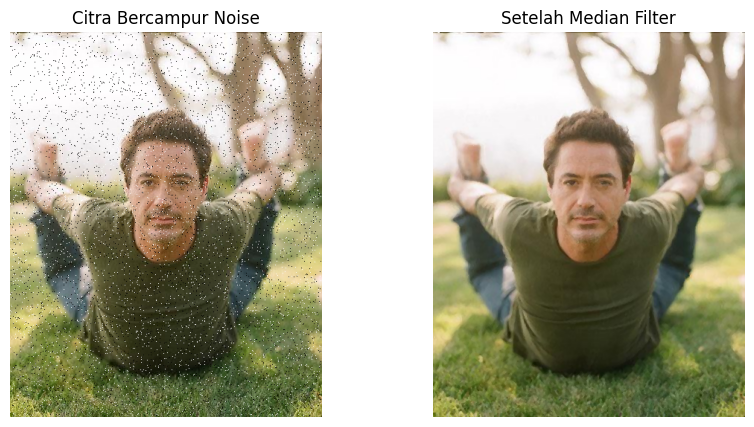

In [ ]:
median_filtered = cv2.medianBlur(noisy_img, 3)  # kernel 3x3

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(noisy_img)
plt.title('Citra Bercampur Noise')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(median_filtered)
plt.title('Setelah Median Filter')
plt.axis('off')

plt.show()

#**Mean Filter**

In [ ]:
noise = np.random.normal(0, 20, img_rgb.shape)
noisy_img = cv2.add(img_rgb, noise.astype(np.uint8))

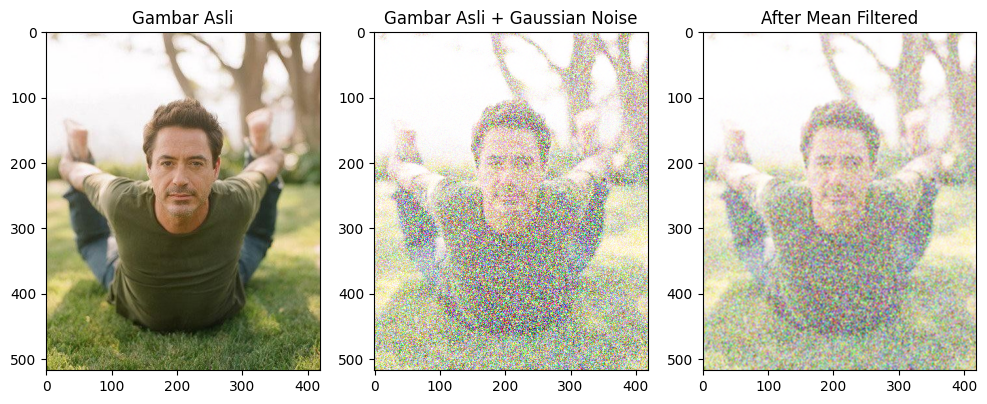

In [ ]:
# mean filter
mean_filtered = cv2.blur(noisy_img, (3,3))

# visualisasi
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img_rgb, cmap='gray'), plt.title('Gambar Asli')
plt.subplot(1,3,2), plt.imshow(noisy_img, cmap='gray'), plt.title('Gambar Asli + Gaussian Noise')
plt.subplot(1,3,3), plt.imshow(mean_filtered, cmap='gray'), plt.title('After Mean Filtered')
plt.show()

# **Sobel Edge Detection**

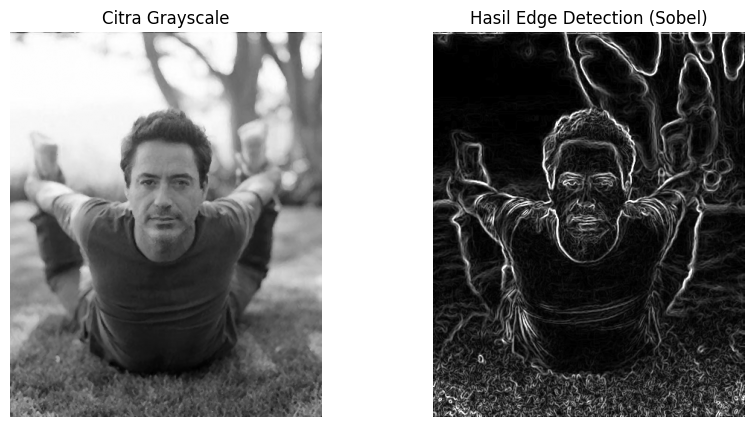

In [ ]:
gray = cv2.cvtColor(median_filtered, cv2.COLOR_BGR2GRAY)

grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

sobel_total = cv2.magnitude(grad_x, grad_y)
sobel_total = cv2.convertScaleAbs(sobel_total)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sobel_total, cmap='gray')
plt.title('Hasil Edge Detection (Sobel)')
plt.axis('off')

plt.show()

# **Roberts Edge Detection**

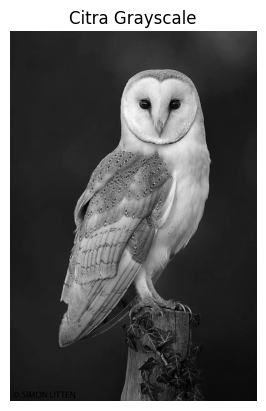

In [ ]:
img = cv2.imread("owl.jpeg")
img_grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')
plt.show()

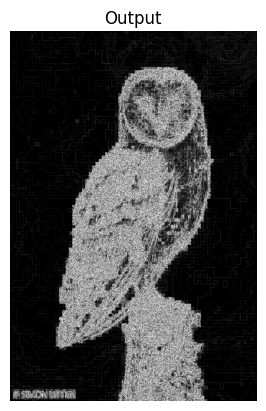

In [ ]:
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

vertical = ndimage.convolve( img_grayscale, roberts_cross_v )
horizontal = ndimage.convolve( img_grayscale, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
plt.imshow(edged_img, cmap='gray')
plt.title('Output')
plt.axis('off')
plt.show()

# **Prewit Detection**

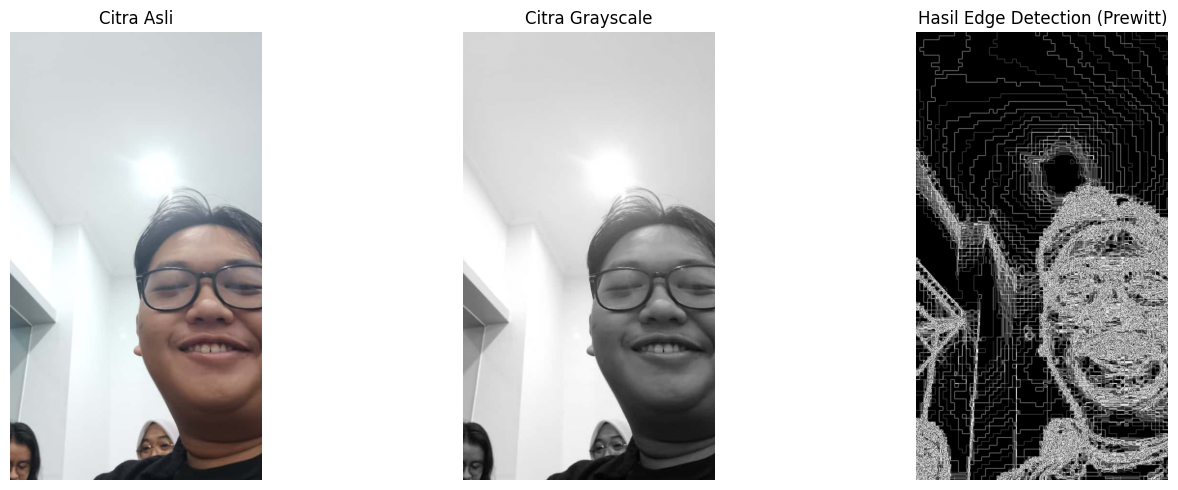

In [ ]:
img = cv2.imread("ganteng.jpg")

# grayscale
img_grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

prewitt_kernel_x = np.array([[ -1, 0, 1],
                             [ -1, 0, 1],
                             [ -1, 0, 1]])

prewitt_kernel_y = np.array([[ 1,  1,  1],
                             [ 0,  0,  0],
                             [-1, -1, -1]])

# Konvolusi dengan kernel Prewitt
img_prewitt_x = ndimage.convolve(img_grayscale, prewitt_kernel_x)
img_prewitt_y = ndimage.convolve(img_grayscale, prewitt_kernel_y)

# Magnitudo hasil tepi
edged_img = np.sqrt(np.square(img_prewitt_x) + np.square(img_prewitt_y))

# Normalisasi agar tampil jelas
edged_img = (edged_img / edged_img.max()) * 255
edged_img = edged_img.astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edged_img, cmap='gray')
plt.title('Hasil Edge Detection (Prewitt)')
plt.axis('off')

plt.tight_layout()
plt.show()
